# VencoPy Tutorial 5

This tutorial aims to give a more in depth overview into the dataParser module and showcases some features that can be customised.

In [1]:
import os, sys
import pandas as pd
import numpy as np
import yaml
import pathlib
from ruamel.yaml import YAML

path = '../..'
os.chdir('C:/8_Work/VencoPy/VencoPy_internal/vencopy')


from classes.dataParsers import DataParser
from classes.tripDiaryBuilders import TripDiaryBuilder
from classes.gridModelers import GridModeler
from classes.flexEstimators import FlexEstimator
from classes.evaluators import Evaluator

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\8_Work\VencoPy\VencoPy_internal\vencopy


In [2]:
pathGlobalConfig = pathlib.Path.cwd() / 'config' / 'globalConfig.yaml'
with open(pathGlobalConfig) as ipf:
    globalConfig = yaml.load(ipf, Loader=yaml.SafeLoader)
pathLocalPathConfig = pathlib.Path.cwd()  / 'config' / 'localPathConfig.yaml'
with open(pathLocalPathConfig) as ipf:
    localPathConfig = yaml.load(ipf, Loader=yaml.SafeLoader)
pathParseConfig = pathlib.Path.cwd()  / 'config' / 'parseConfig.yaml'
with open(pathParseConfig) as ipf:
    parseConfig = yaml.load(ipf, Loader=yaml.SafeLoader)
pathTripConfig = pathlib.Path.cwd()  / 'config' / 'tripConfig.yaml'
with open(pathTripConfig) as ipf:
    tripConfig = yaml.load(ipf, Loader=yaml.SafeLoader)
pathGridConfig = pathlib.Path.cwd()  / 'config' / 'gridConfig.yaml'
with open(pathGridConfig) as ipf:
    gridConfig = yaml.load(ipf, Loader=yaml.SafeLoader)
pathEvaluatorConfig = pathlib.Path.cwd()  / 'config' / 'evaluatorConfig.yaml'
with open(pathEvaluatorConfig) as ipf:
    evaluatorConfig = yaml.load(ipf, Loader=yaml.SafeLoader)
pathFlexConfig = pathlib.Path.cwd()  / 'config' / 'flexConfig.yaml'
with open(pathFlexConfig) as ipf:
    flexConfig = yaml.load(ipf, Loader=yaml.SafeLoader)
    
    
# Set reference dataset 
datasetID = 'MiD17'

# Modify the localPathConfig file to point to the .csv file in the sampling folder in the tutorials directory where the dataset for the tutorials lies.
localPathConfig['pathAbsolute'][datasetID] = pathlib.Path.cwd() / 'tutorials' / 'data_sampling'

# Assign to vencoPyRoot the folder in which you cloned your repository
localPathConfig['pathAbsolute']['vencoPyRoot'] = pathlib.Path.cwd()

# Similarly we modify the datasetID in the global config file
globalConfig['files'][datasetID]['tripsDataRaw'] = datasetID + '.csv'

# We also modify the parseConfig by removing some of the columns that are normally parsed from the MiD, which are not available in our semplified test dataframe
del parseConfig['dataVariables']['hhID'] 
del parseConfig['dataVariables']['personID'] 

## FlexEstimator config file

The FlexEstimator config file contains the technical specifications..

In [3]:
yaml.dump(flexConfig, sys.stdout)

inputDataScalars:
  Battery_capacity: 50.0
  Electric_consumption_Artemis: 20.0
  Electric_consumption_NEFZ: 20.0
  Fuel_consumption_Artemis: 1.0
  Fuel_consumption_NEFZ: 1.0
  Is_BEV?: 1
  Maximum_SOC: 0.97
  Minimum_SOC: 0.03
  Minimum_daily_mileage: 0.0
  Rated_power_of_charging_column: 11.0


## _FlexEstimator_ class

To use the FlexEstimator class, we first need to run the DataParses as this is an argument to the FlexEstimator class.

In [4]:
vpData = DataParser(datasetID=datasetID, parseConfig=parseConfig, globalConfig=globalConfig, localPathConfig=localPathConfig, loadEncrypted=False)

Parsing properties set up
Starting to retrieve local data file from C:\8_Work\VencoPy\VencoPy_internal\vencopy\tutorials\data_sampling\MiD17.csv
Finished loading 2124 rows of raw data of type .csv
Finished harmonization of variables
Starting filtering, applying 8 filters.
The following values were taken into account after filtering:
{'isMIVDriver': 1287,
 'tripDistance': 1948,
 'tripEndClock': 2124,
 'tripEndHour': 2124,
 'tripIsIntermodal': 1682,
 'tripPurpose': 2115,
 'tripStartClock': 2124,
 'tripStartHour': 2124}
All filters combined yielded a total of 950 was taken into account
This corresponds to 44.72693032015066 percent of the original data
Parsing completed


In [5]:
# Estimate charging flexibility based on driving profiles and charge connection
vpFlex = FlexEstimator(flexConfig=flexConfig, globalConfig=globalConfig, evaluatorConfig=evaluatorConfig, datasetID=datasetID, ParseData=vpData)
vpFlex.baseProfileCalculation()
vpFlex.filter()
vpFlex.aggregate()
vpFlex.correct()
vpFlex.normalize()
vpFlex.writeOut()

Reading Venco input scalars, drive profiles and boolean plug profiles
There are 267 drive profiles and 267 plug profiles.
Flex Estimator initialization complete
Starting with iteration 0
9976.124148541114
Starting with iteration 1
0.0
Starting with iteration 2
0.0
0.0
0.0
0.0
Base profile calculation complete for dataset MiD17
There are 262 considered profiles and 259 DSM eligible profiles.


Evaluator initialization complete


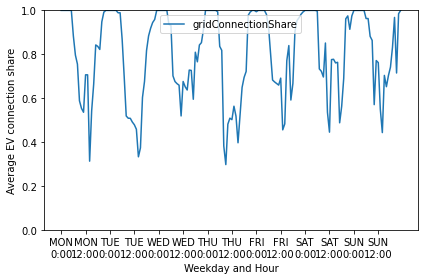

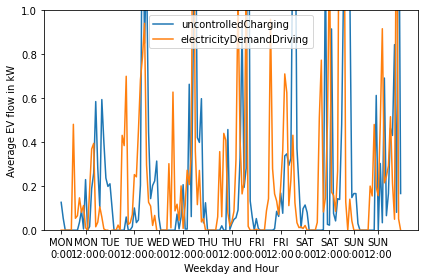

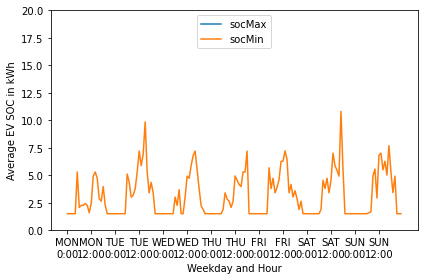

In [6]:
vpEval = Evaluator(globalConfig=globalConfig, evaluatorConfig=evaluatorConfig, parseData=pd.Series(data=vpData, index=[datasetID]))
vpEval.plotProfiles(flexEstimator=vpFlex)

To analyse its influence on the demand-side flexibility from EV, we will though charge the assumed size of the battery from 50 kWh to 75 kWh.

In [10]:
flexConfig['inputDataScalars']['Battery_capacity'] = 100.0
yaml.dump(flexConfig, sys.stdout)

inputDataScalars:
  Battery_capacity: 100.0
  Electric_consumption_Artemis: 20.0
  Electric_consumption_NEFZ: 20.0
  Fuel_consumption_Artemis: 1.0
  Fuel_consumption_NEFZ: 1.0
  Is_BEV?: 1
  Maximum_SOC: 0.97
  Minimum_SOC: 0.03
  Minimum_daily_mileage: 0.0
  Rated_power_of_charging_column: 11.0


In [11]:
# Estimate charging flexibility based on driving profiles and charge connection
vpFlex = FlexEstimator(flexConfig=flexConfig, globalConfig=globalConfig, evaluatorConfig=evaluatorConfig, datasetID=datasetID, ParseData=vpData)
vpFlex.baseProfileCalculation()
vpFlex.filter()
vpFlex.aggregate()
vpFlex.correct()
vpFlex.normalize()
vpFlex.writeOut()

Reading Venco input scalars, drive profiles and boolean plug profiles
There are 267 drive profiles and 267 plug profiles.
Flex Estimator initialization complete
Starting with iteration 0
22668.530723140793
Starting with iteration 1
131.8947021943568
Starting with iteration 2
0.0
0.0
0.0
0.0
Base profile calculation complete for dataset MiD17
There are 264 considered profiles and 263 DSM eligible profiles.


Evaluator initialization complete


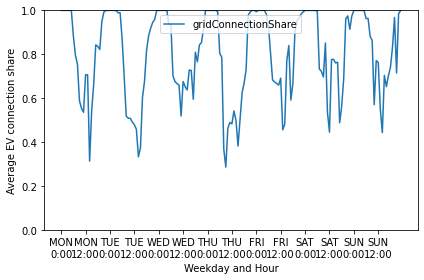

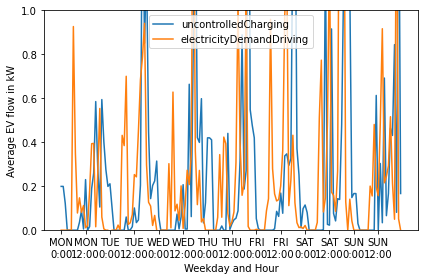

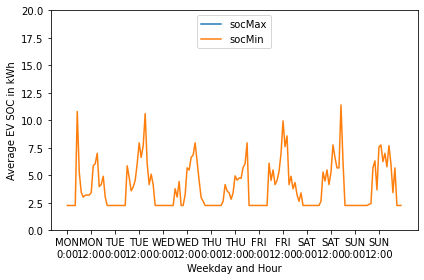

In [9]:
vpEval = Evaluator(globalConfig=globalConfig, evaluatorConfig=evaluatorConfig, parseData=pd.Series(data=vpData, index=[datasetID]))
vpEval.plotProfiles(flexEstimator=vpFlex)

4 more profiles eligible

## Next Steps

Come back, there will be more upcoming tutorials! :)